Pengguna-1 tiba pada 5.10 menit
Pengguna-1 mulai dilayani pada 5.10 menit (Waktu tunggu: 5.10 menit)
Pengguna-2 tiba pada 5.23 menit
Pengguna-2 mulai dilayani pada 5.23 menit (Waktu tunggu: 0.13 menit)
Pengguna-3 tiba pada 6.63 menit
Pengguna-2 selesai dilayani pada 12.23 menit
Pengguna-3 mulai dilayani pada 12.23 menit (Waktu tunggu: 7.00 menit)
Pengguna-4 tiba pada 13.30 menit
Pengguna-1 selesai dilayani pada 14.10 menit
Pengguna-4 mulai dilayani pada 14.10 menit (Waktu tunggu: 7.47 menit)
Pengguna-5 tiba pada 20.05 menit
Pengguna-6 tiba pada 20.50 menit
Pengguna-7 tiba pada 23.24 menit
Pengguna-8 tiba pada 23.39 menit
Pengguna-9 tiba pada 24.63 menit
Pengguna-4 selesai dilayani pada 27.10 menit
Pengguna-5 mulai dilayani pada 27.10 menit (Waktu tunggu: 13.80 menit)
Pengguna-3 selesai dilayani pada 27.23 menit
Pengguna-6 mulai dilayani pada 27.23 menit (Waktu tunggu: 7.18 menit)
Pengguna-10 tiba pada 28.15 menit
Pengguna-11 tiba pada 29.26 menit
Pengguna-5 selesai dilayani pada 32.10 

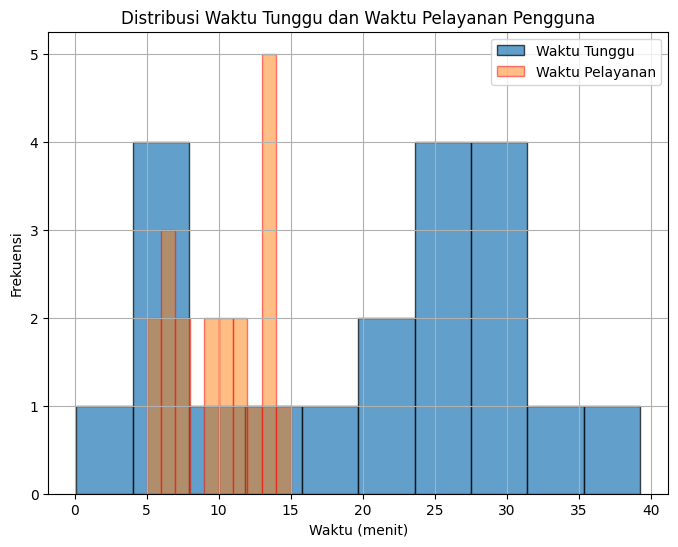

In [2]:
import simpy
import random
import matplotlib.pyplot as plt

# Parameter simulasi
RANDOM_SEED = 42
USER_ARRIVAL_RATE = 5  # Rata-rata waktu antar kedatangan pengguna (dalam menit)
SERVICE_TIME_MIN = 5  # Waktu layanan minimum (dalam menit)
SERVICE_TIME_MAX = 15  # Waktu layanan maksimum (dalam menit)
SIMULATION_TIME = 100  # Waktu total simulasi (dalam menit)

class DigitalLibraryPlatform:
    def __init__(self, env, num_librarians):
        self.env = env
        self.librarian = simpy.Resource(env, num_librarians)
        self.waiting_times = []
        self.service_times = []
        self.total_service_time = 0

    def assist_user(self, user):
        service_time = random.randint(SERVICE_TIME_MIN, SERVICE_TIME_MAX)
        self.service_times.append(service_time)
        self.total_service_time += service_time
        yield self.env.timeout(service_time)
        print(f"{user} selesai dilayani pada {self.env.now:.2f} menit")

def user_generator(env, platform):
    user_id = 0
    while True:
        arrival_time = env.now
        yield env.timeout(random.expovariate(1.0 / USER_ARRIVAL_RATE))
        user_id += 1
        print(f"Pengguna-{user_id} tiba pada {env.now:.2f} menit")
        env.process(handle_user(env, f"Pengguna-{user_id}", platform, arrival_time))

def handle_user(env, user, platform, arrival_time):
    with platform.librarian.request() as request:
        yield request
        waiting_time = env.now - arrival_time
        platform.waiting_times.append(waiting_time)
        print(f"{user} mulai dilayani pada {env.now:.2f} menit (Waktu tunggu: {waiting_time:.2f} menit)")
        yield env.process(platform.assist_user(user))

# Inisialisasi dan jalankan simulasi
random.seed(RANDOM_SEED)
env = simpy.Environment()
platform = DigitalLibraryPlatform(env, num_librarians=2)
env.process(user_generator(env, platform))
env.run(until=SIMULATION_TIME)

# Analisis hasil
average_waiting_time = sum(platform.waiting_times) / len(platform.waiting_times)
system_utilization = platform.total_service_time / (SIMULATION_TIME * platform.librarian.capacity) * 100

print(f"\nRata-rata waktu tunggu: {average_waiting_time:.2f} menit")
print(f"Tingkat pemanfaatan sistem: {system_utilization:.2f}%")

# Visualisasi hasil
plt.figure(figsize=(8, 6))
plt.hist(platform.waiting_times, bins=10, edgecolor='black', alpha=0.7, label='Waktu Tunggu')
plt.hist(platform.service_times, bins=10, edgecolor='red', alpha=0.5, label='Waktu Pelayanan')
plt.title('Distribusi Waktu Tunggu dan Waktu Pelayanan Pengguna')
plt.xlabel('Waktu (menit)')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.show()
